In [21]:
# Imports
import numpy as np
np.set_printoptions(precision=2)
import matplotlib.pyplot as plt

In [118]:
### Simulación de una cadena de Markov ###
def trans(x, u, P):
    """
    Recibe un estado x, una v.a. uniforme u y una matriz de transición P.
    Retorna el siguiente estado de la cadena.
    """
    suma = 0
    y = 0
    while True:
        suma += P[x, y]
        if suma >= u: break
        y+=1
    return y

def CM(N, x_0, P):
    """
    Retorna N pasos de una cadena con matriz de transición P y estado inicial x_0
    """
    U = np.random.rand(N)
    cadena = np.zeros(N, dtype="int")
    cadena[0] = x_0
    for i in range(1, N):
        cadena[i] = trans(cadena[i-1], U[i], P)
    return cadena

In [119]:
### Modelación del problema

def transMat(n, beta):
    """
    Matriz de transición para el paseo aleatorio sesgado en {0,...,n} con sesgo 0<beta<1/3.
    """
    P = np.zeros((n+1, n+1))
    # Casos borde
    P[0, 1] = 1/3 - beta
    P[0, 0] = 2/3 + beta
    P[n, n-1] = 1/3 + beta
    P[n, n] = 2/3 - beta
    for i in range(1, n):
        P[i, i+1] = 1/3 - beta
        P[i, i] = 1/3
        P[i, i-1] = 1/3 + beta
    return P

def distInv(n, beta):
    """
    Distribución invariante de la cadena, depende solo de beta
    """
    pi = np.zeros(n+1)
    pi[0] = 2*beta/(1/3+beta)
    for i in range(1, n+1):
        pi[i] = pi[0]*((1/3-beta)/(1/3+beta))**i
    return pi

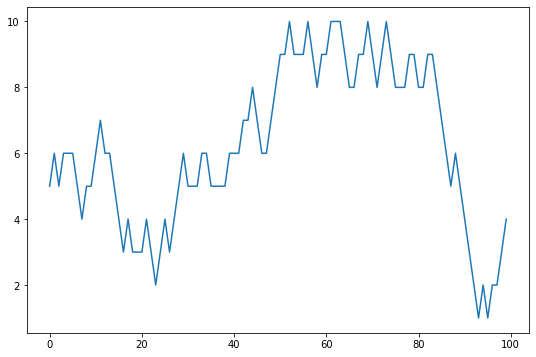

In [122]:
### Tests ###
n, N, beta = 10, 100, 0.001
M = transMat(n, beta)
x_0 = 5

plt.figure(figsize=(9,6))
plt.plot(CM(N, x_0, M))

In [111]:
np.random.rand(10)

array([0.16, 0.37, 0.51, 0.85, 0.14, 0.68, 0.1 , 0.02, 0.24, 0.52])